In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 1. ĐỌC VÀ CHUẨN BỊ DỮ LIỆU

# Tên các cột trong dataset
print("Trần Phương Anh - 6351071002")
column_names = ['id', 'diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se',
    'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Đọc dữ liệu
df = pd.read_csv('wdbc.data', header=None, names=column_names)

print("="*70)
print("THÔNG TIN DỮ LIỆU")
print("="*70)
print(f"Số lượng mẫu: {len(df)}")
print(f"Số lượng thuộc tính: {len(df.columns) - 2}")  # Trừ id và diagnosis
print(f"\nPhân bố chẩn đoán thực tế:")
print(df['diagnosis'].value_counts())
print(f"  - M (Malignant - Ác tính): {(df['diagnosis'] == 'M').sum()}")
print(f"  - B (Benign - Lành tính): {(df['diagnosis'] == 'B').sum()}")

# Hiển thị 5 dòng đầu
print("\n5 mẫu đầu tiên:")
print(df.head())


Trần Phương Anh - 6351071002
THÔNG TIN DỮ LIỆU
Số lượng mẫu: 569
Số lượng thuộc tính: 30

Phân bố chẩn đoán thực tế:
diagnosis
B    357
M    212
Name: count, dtype: int64
  - M (Malignant - Ác tính): 212
  - B (Benign - Lành tính): 357

5 mẫu đầu tiên:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990     

In [5]:
# 2. CHUẨN HÓA DỮ LIỆU

# Tách features và label
print("Trần Phương Anh - 6351071002")
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Chuẩn hóa dữ liệu (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n" + "="*70)
print("DỮ LIỆU ĐÃ ĐƯỢC CHUẨN HÓA (StandardScaler)")
print("="*70)

Trần Phương Anh - 6351071002

DỮ LIỆU ĐÃ ĐƯỢC CHUẨN HÓA (StandardScaler)


Trần Phương Anh - 6351071002

Đang tính toán phương pháp Elbow...


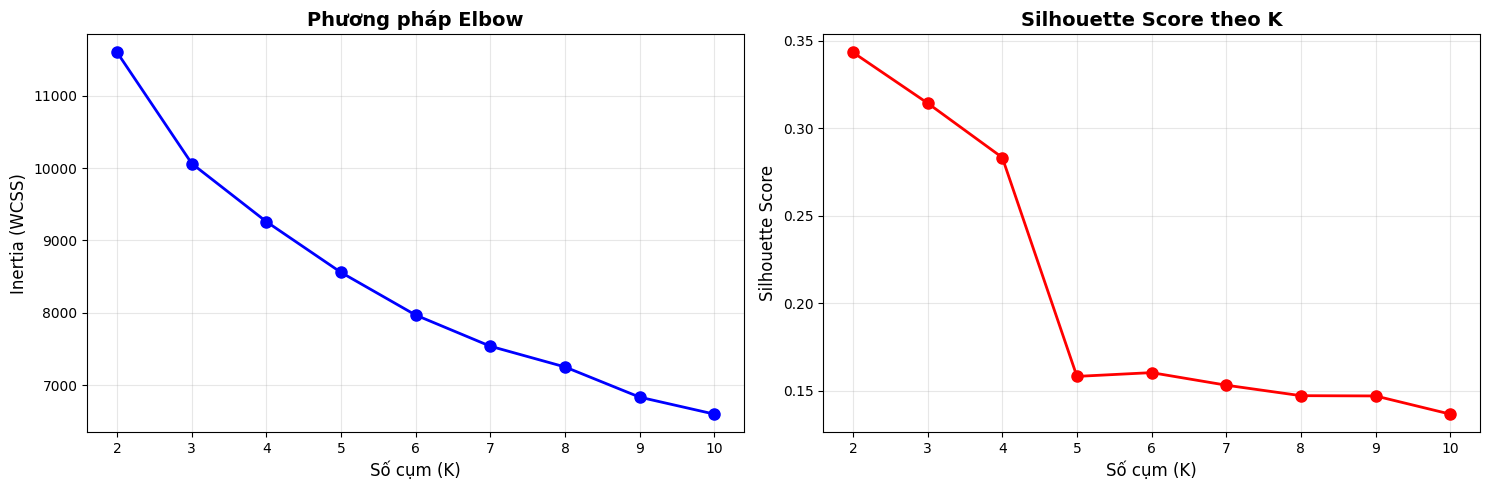

In [6]:
# 3. PHƯƠNG PHÁP ELBOW ĐỂ TÌM K TỐI ƯU
print("Trần Phương Anh - 6351071002")
print("\nĐang tính toán phương pháp Elbow...")

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Vẽ biểu đồ Elbow
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Số cụm (K)', fontsize=12)
ax1.set_ylabel('Inertia (WCSS)', fontsize=12)
ax1.set_title('Phương pháp Elbow', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Số cụm (K)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score theo K', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [7]:
# 4. THỰC HIỆN K-MEANS VỚI K=2

print("Trần Phương Anh - 6351071002")
print("\n" + "="*70)
print("THỰC HIỆN K-MEANS CLUSTERING VỚI K=2")
print("="*70)

k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_scaled)

# Thêm cột cluster vào dataframe
df['cluster'] = clusters

# Tính Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")

Trần Phương Anh - 6351071002

THỰC HIỆN K-MEANS CLUSTERING VỚI K=2

Silhouette Score: 0.3434


In [8]:
# 5. PHÂN TÍCH KẾT QUẢ

print("Trần Phương Anh - 6351071002")
print("\n" + "="*70)
print("PHÂN TÍCH KẾT QUẢ PHÂN CỤM")
print("="*70)

for i in range(k_optimal):
    cluster_data = df[df['cluster'] == i]
    total = len(cluster_data)
    malignant = (cluster_data['diagnosis'] == 'M').sum()
    benign = (cluster_data['diagnosis'] == 'B').sum()

    print(f"\n📊 CỤM {i}:")
    print(f"   Tổng số mẫu: {total}")
    print(f"   Ác tính (M): {malignant} ({malignant/total*100:.1f}%)")
    print(f"   Lành tính (B): {benign} ({benign/total*100:.1f}%)")

# Ma trận nhầm lẫn
print("\n" + "="*70)
print("MA TRẬN SO SÁNH: Cluster vs Chẩn đoán thực tế")
print("="*70)

# Tạo mapping: nếu cluster 0 có nhiều M hơn thì gán cluster 0 = M
cluster_0_malignant = (df[df['cluster'] == 0]['diagnosis'] == 'M').sum()
cluster_1_malignant = (df[df['cluster'] == 1]['diagnosis'] == 'M').sum()

if cluster_0_malignant > cluster_1_malignant:
    predicted = df['cluster'].map({0: 'M', 1: 'B'})
else:
    predicted = df['cluster'].map({0: 'B', 1: 'M'})

# Ma trận confusion
cm = confusion_matrix(df['diagnosis'], predicted, labels=['M', 'B'])
print("\nMa trận nhầm lẫn:")
print(pd.DataFrame(cm,
                   index=['Thực tế: M', 'Thực tế: B'],
                   columns=['Dự đoán: M', 'Dự đoán: B']))

# Tính accuracy
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\nĐộ chính xác phân cụm: {accuracy*100:.2f}%")

Trần Phương Anh - 6351071002

PHÂN TÍCH KẾT QUẢ PHÂN CỤM

📊 CỤM 0:
   Tổng số mẫu: 375
   Ác tính (M): 36 (9.6%)
   Lành tính (B): 339 (90.4%)

📊 CỤM 1:
   Tổng số mẫu: 194
   Ác tính (M): 176 (90.7%)
   Lành tính (B): 18 (9.3%)

MA TRẬN SO SÁNH: Cluster vs Chẩn đoán thực tế

Ma trận nhầm lẫn:
            Dự đoán: M  Dự đoán: B
Thực tế: M         176          36
Thực tế: B          18         339

Độ chính xác phân cụm: 90.51%


Trần Phương Anh - 6351071002

TRỰC QUAN HÓA KẾT QUẢ


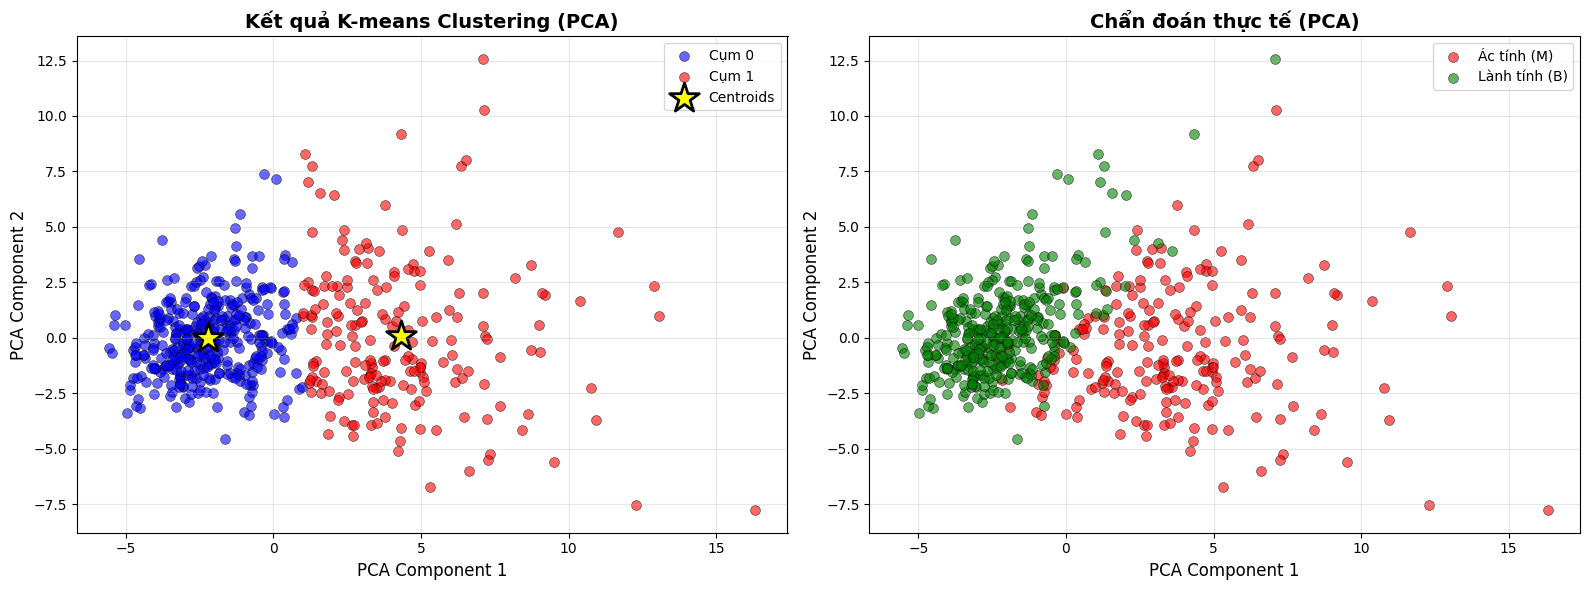

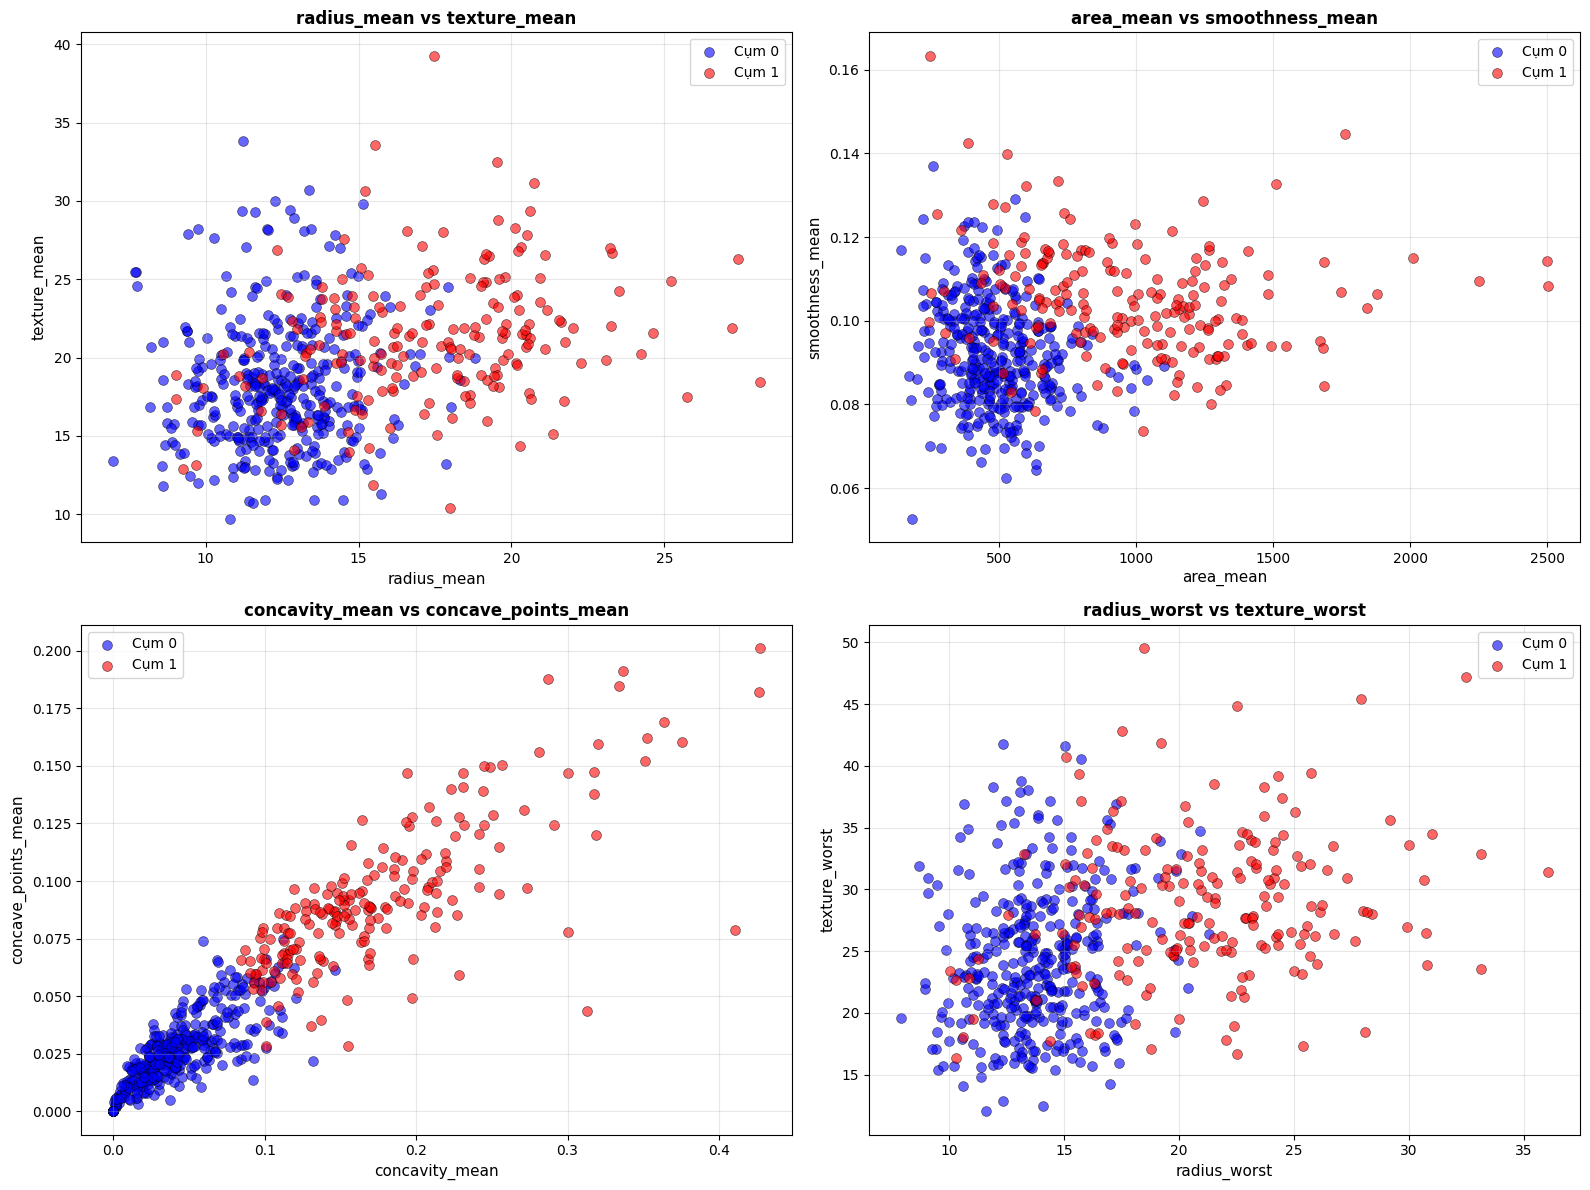

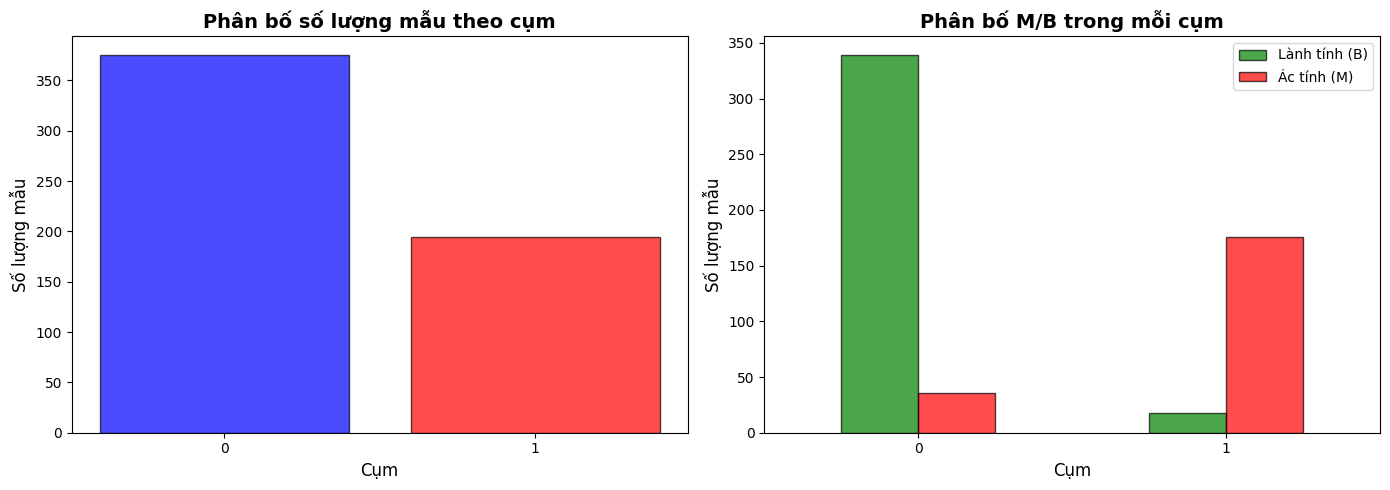


✅ HOÀN THÀNH PHÂN TÍCH!


In [9]:
# 6. TRỰC QUAN HÓA KẾT QUẢ

print("Trần Phương Anh - 6351071002")
print("\n" + "="*70)
print("TRỰC QUAN HÓA KẾT QUẢ")
print("="*70)

# 6.1: Sử dụng PCA để giảm chiều về 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Biểu đồ 1: Phân cụm theo K-means
colors_cluster = {0: 'blue', 1: 'red'}
for i in range(k_optimal):
    cluster_points = df[df['cluster'] == i]
    axes[0].scatter(cluster_points['pca1'], cluster_points['pca2'],
                   c=colors_cluster[i], label=f'Cụm {i}',
                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Vẽ centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='yellow', marker='*', s=500, edgecolors='black',
               linewidth=2, label='Centroids')

axes[0].set_xlabel('PCA Component 1', fontsize=12)
axes[0].set_ylabel('PCA Component 2', fontsize=12)
axes[0].set_title('Kết quả K-means Clustering (PCA)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Biểu đồ 2: Chẩn đoán thực tế
colors_diagnosis = {'M': 'red', 'B': 'green'}
for diagnosis in ['M', 'B']:
    diagnosis_points = df[df['diagnosis'] == diagnosis]
    label = 'Ác tính (M)' if diagnosis == 'M' else 'Lành tính (B)'
    axes[1].scatter(diagnosis_points['pca1'], diagnosis_points['pca2'],
                   c=colors_diagnosis[diagnosis], label=label,
                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

axes[1].set_xlabel('PCA Component 1', fontsize=12)
axes[1].set_ylabel('PCA Component 2', fontsize=12)
axes[1].set_title('Chẩn đoán thực tế (PCA)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6.2: Biểu đồ so sánh 2 thuộc tính cụ thể
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

feature_pairs = [
    ('radius_mean', 'texture_mean'),
    ('area_mean', 'smoothness_mean'),
    ('concavity_mean', 'concave_points_mean'),
    ('radius_worst', 'texture_worst')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx // 2, idx % 2]

    for i in range(k_optimal):
        cluster_points = df[df['cluster'] == i]
        ax.scatter(cluster_points[feat1], cluster_points[feat2],
                  c=colors_cluster[i], label=f'Cụm {i}',
                  alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

    ax.set_xlabel(feat1, fontsize=11)
    ax.set_ylabel(feat2, fontsize=11)
    ax.set_title(f'{feat1} vs {feat2}', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6.3: Biểu đồ phân bố các cụm
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Phân bố số lượng mẫu
cluster_counts = df['cluster'].value_counts().sort_index()
axes[0].bar(cluster_counts.index, cluster_counts.values,
           color=['blue', 'red'], alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Cụm', fontsize=12)
axes[0].set_ylabel('Số lượng mẫu', fontsize=12)
axes[0].set_title('Phân bố số lượng mẫu theo cụm', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(k_optimal))

# Phân bố M và B trong mỗi cụm
cluster_diagnosis = df.groupby(['cluster', 'diagnosis']).size().unstack(fill_value=0)
cluster_diagnosis.plot(kind='bar', ax=axes[1], color=['green', 'red'],
                       alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Cụm', fontsize=12)
axes[1].set_ylabel('Số lượng mẫu', fontsize=12)
axes[1].set_title('Phân bố M/B trong mỗi cụm', fontsize=14, fontweight='bold')
axes[1].legend(['Lành tính (B)', 'Ác tính (M)'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

print("\n✅ HOÀN THÀNH PHÂN TÍCH!")
print("="*70)